In [1]:
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import numpy as np

In [2]:
#Setting Input Attributes
temp = ctrl.Antecedent(np.arange(16,31,1),'temp')
t_dif = ctrl.Antecedent(np.arange(-1,3,0.1),'t_dif')
d_point = ctrl.Antecedent(np.arange(10,18,1),'dew')
e_volt = ctrl.Antecedent(np.arange(130,220,10),'ev')

In [3]:
#Setting Input Membership Functions
#Membership Function values for temperature
temp['low'] = fuzzy.trapmf(temp.universe,[16,16,22,25])
temp['medium'] = fuzzy.trimf(temp.universe,[22,25,28])
temp['high'] = fuzzy.trapmf(temp.universe,[25,28,30,30])
#Membership Function values for temperature difference
t_dif['negative'] = fuzzy.trimf(t_dif.universe,[-1,-1,0])
t_dif['zero'] = fuzzy.trimf(t_dif.universe,[-0.5,0,0.5])
t_dif['positive'] = fuzzy.trimf(t_dif.universe,[0,1,2])
t_dif['large'] = fuzzy.trapmf(t_dif.universe,[1,2,3,3])
#Membership Function values for Dew Point
d_point['optimal'] = fuzzy.trapmf(d_point.universe,[10,10,11,14])
d_point['humid'] = fuzzy.trapmf(d_point.universe,[12,15,18,18])
#Membership Function values for Electric Volt
e_volt['low'] = fuzzy.trapmf(e_volt.universe,[130,130,160,180])
e_volt['high'] = fuzzy.trapmf(e_volt.universe,[170,190,220,220])

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backe

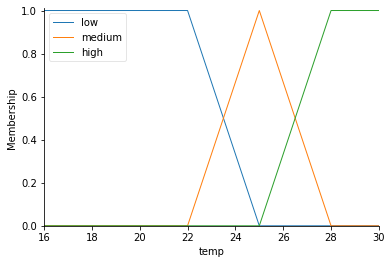

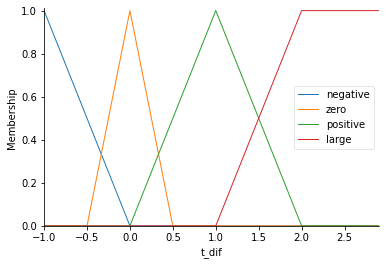

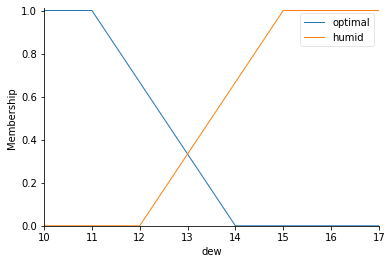

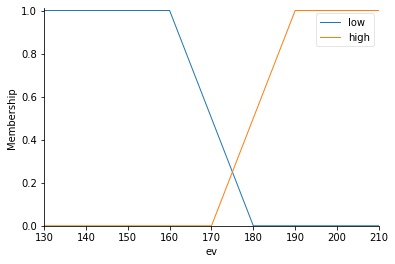

In [4]:
temp.view()
t_dif.view()
d_point.view()
e_volt.view()

In [5]:
#Setting Output Attributes
c_speed = ctrl.Consequent(np.arange(0,110,10),'comp_speed')
f_speed = ctrl.Consequent(np.arange(0,110,10),'fan_speed')
mo = ctrl.Consequent(np.arange(0,1.1,0.1),'mo')
f_dir = ctrl.Consequent(np.arange(0,100,10),'f_dir')

In [6]:
#Setting Output Membership Functions
#Membership Function Values for Compressor Speed
c_speed['low'] = fuzzy.trapmf(c_speed.universe,[0,0,30,50])
c_speed['medium'] = fuzzy.trimf(c_speed.universe,[40,60,80])
c_speed['fast'] = fuzzy.trapmf(c_speed.universe,[70,90,100,100])
#Membership Function Values for Fan Speed
f_speed['low'] = fuzzy.trapmf(f_speed.universe,[0,0,30,50])
f_speed['medium'] = fuzzy.trimf(f_speed.universe,[40,60,80])
f_speed['fast'] = fuzzy.trapmf(f_speed.universe,[70,90,100,100])
#Membership Function for Mode of Operation
mo['ac'] = fuzzy.trimf(mo.universe,[0,1,1])
mo['de'] = fuzzy.trimf(mo.universe,[0,0,1])
#Membership Function Values for Fan Direction
f_dir['towards'] = fuzzy.trapmf(f_dir.universe,[0,0,40,70])
f_dir['away'] = fuzzy.trapmf(f_dir.universe,[40,70,90,90])

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backe

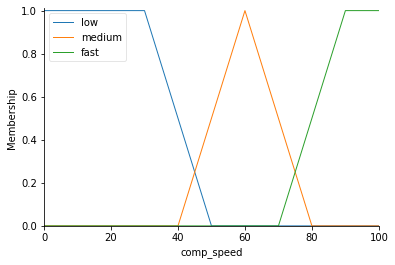

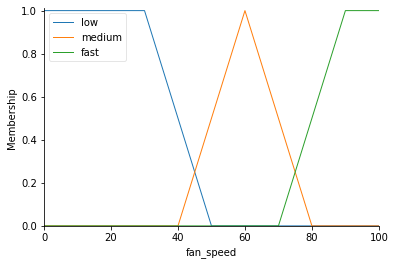

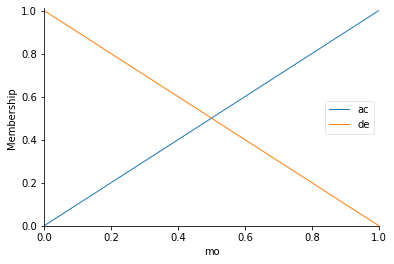

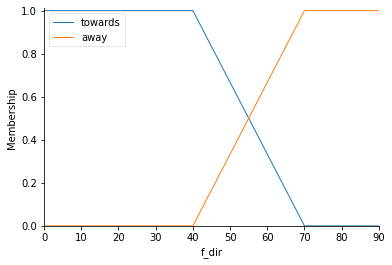

In [7]:
c_speed.view()
f_speed.view()
mo.view()
f_dir.view()

In [8]:
#Rules for Fuzzy
csr_list = []
rule_1 = ctrl.Rule(temp['low']&t_dif['negative']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_1)
rule_2 = ctrl.Rule(temp['medium']&t_dif['negative']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_2)
rule_3 = ctrl.Rule(temp['high']&t_dif['negative']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_3)
rule_4 = ctrl.Rule(temp['low']&t_dif['zero']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_4)
rule_5 = ctrl.Rule(temp['medium']&t_dif['zero']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_5)
rule_6 = ctrl.Rule(temp['high']&t_dif['zero']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_6)
rule_7 = ctrl.Rule(temp['low']&t_dif['positive']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_7)
rule_8 = ctrl.Rule(temp['medium']&t_dif['positive']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_8)
rule_9 = ctrl.Rule(temp['high']&t_dif['positive']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_9)
rule_10 = ctrl.Rule(temp['low']&t_dif['large']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_10)
rule_11 = ctrl.Rule(temp['medium']&t_dif['large']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_11)
rule_12 = ctrl.Rule(temp['high']&t_dif['large']&d_point['optimal']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_12)
rule_13 = ctrl.Rule(temp['low']&t_dif['negative']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_13)
rule_14 = ctrl.Rule(temp['medium']&t_dif['negative']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_14)
rule_15 = ctrl.Rule(temp['high']&t_dif['negative']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_15)
rule_16 = ctrl.Rule(temp['low']&t_dif['zero']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_16)
rule_17 = ctrl.Rule(temp['medium']&t_dif['zero']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['medium'],mo['ac'],f_dir['towards']])
csr_list.append(rule_17)
rule_18 = ctrl.Rule(temp['high']&t_dif['zero']&d_point['optimal']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_18)
rule_19 = ctrl.Rule(temp['low']&t_dif['positive']&d_point['optimal']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_19)
rule_20 = ctrl.Rule(temp['medium']&t_dif['positive']&d_point['optimal']&e_volt['high'],[c_speed['medium'],f_speed['medium'],mo['ac'],f_dir['towards']])
csr_list.append(rule_20)
rule_21 = ctrl.Rule(temp['high']&t_dif['positive']&d_point['optimal']&e_volt['high'],[c_speed['medium'],f_speed['medium'],mo['ac'],f_dir['towards']])
csr_list.append(rule_21)
rule_22 = ctrl.Rule(temp['low']&t_dif['large']&d_point['optimal']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_22)
rule_23 = ctrl.Rule(temp['medium']&t_dif['large']&d_point['optimal']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_23)
rule_24 = ctrl.Rule(temp['high']&t_dif['large']&d_point['optimal']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_24)
rule_25 = ctrl.Rule(temp['low']&t_dif['negative']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_25)
rule_26 = ctrl.Rule(temp['medium']&t_dif['negative']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_26)
rule_27 = ctrl.Rule(temp['high']&t_dif['negative']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_27)
rule_28 = ctrl.Rule(temp['low']&t_dif['zero']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_28)
rule_29 = ctrl.Rule(temp['medium']&t_dif['zero']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_29)
rule_30 = ctrl.Rule(temp['high']&t_dif['zero']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_30)
rule_31 = ctrl.Rule(temp['low']&t_dif['positive']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_31)
rule_32 = ctrl.Rule(temp['medium']&t_dif['positive']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_32)
rule_33 = ctrl.Rule(temp['high']&t_dif['positive']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_33)
rule_34 = ctrl.Rule(temp['low']&t_dif['large']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_34)
rule_35 = ctrl.Rule(temp['medium']&t_dif['large']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_35)
rule_36 = ctrl.Rule(temp['high']&t_dif['large']&d_point['humid']&e_volt['low'],[c_speed['low'],f_speed['low'],mo['ac'],f_dir['away']])
csr_list.append(rule_36)
rule_37 = ctrl.Rule(temp['low']&t_dif['negative']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['de'],f_dir['towards']])
csr_list.append(rule_37)
rule_38 = ctrl.Rule(temp['medium']&t_dif['negative']&d_point['humid']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['de'],f_dir['away']])
csr_list.append(rule_38)
rule_39 = ctrl.Rule(temp['high']&t_dif['negative']&d_point['humid']&e_volt['high'],[c_speed['low'],f_speed['low'],mo['de'],f_dir['away']])
csr_list.append(rule_39)
rule_40 = ctrl.Rule(temp['low']&t_dif['zero']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['de'],f_dir['towards']])
csr_list.append(rule_40)
rule_41 = ctrl.Rule(temp['medium']&t_dif['zero']&d_point['humid']&e_volt['high'],[c_speed['medium'],f_speed['fast'],mo['de'],f_dir['towards']])
csr_list.append(rule_41)
rule_42 = ctrl.Rule(temp['high']&t_dif['zero']&d_point['humid']&e_volt['high'],[c_speed['medium'],f_speed['medium'],mo['de'],f_dir['towards']])
csr_list.append(rule_42)
rule_43 = ctrl.Rule(temp['low']&t_dif['positive']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_43)
rule_44 = ctrl.Rule(temp['medium']&t_dif['positive']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_44)
rule_45 = ctrl.Rule(temp['high']&t_dif['positive']&d_point['humid']&e_volt['high'],[c_speed['medium'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_45)
rule_46 = ctrl.Rule(temp['low']&t_dif['large']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_46)
rule_47= ctrl.Rule(temp['medium']&t_dif['large']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_47)
rule_48 = ctrl.Rule(temp['high']&t_dif['large']&d_point['humid']&e_volt['high'],[c_speed['fast'],f_speed['fast'],mo['ac'],f_dir['towards']])
csr_list.append(rule_48)

In [9]:
ac_ctrl = ctrl.ControlSystem(csr_list)

In [10]:
ac = ctrl.ControlSystemSimulation(ac_ctrl)

In [11]:
ac.input['temp']  = 29
ac.input['t_dif'] = 1.3
ac.input['dew'] = 15
ac.input['ev'] = 209
ac.compute()
print(ac.output['comp_speed'],ac.output['fan_speed'],ac.output['mo'],ac.output['f_dir'])

67.86034255599472 88.14492753623188 0.6435897435897436 30.05882352941177


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backe

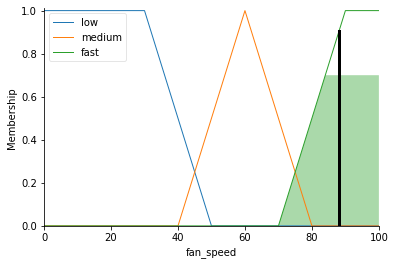

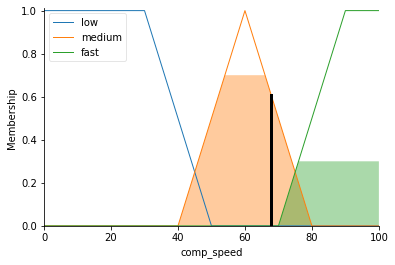

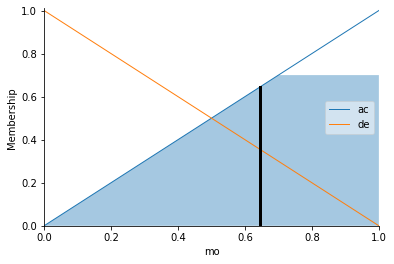

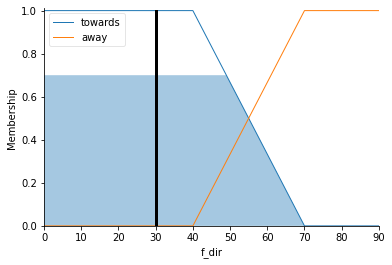

In [12]:
f_speed.view(sim=ac)
c_speed.view(sim=ac)
mo.view(sim=ac)
f_dir.view(sim=ac)

None


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


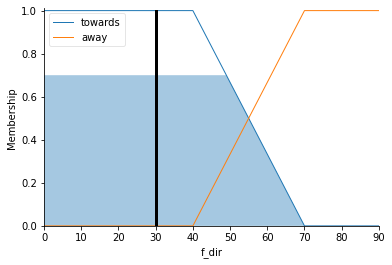

In [13]:
print(f_dir.view(sim=ac))

In [14]:
ac.output

OrderedDict([('comp_speed', 67.86034255599472),
             ('fan_speed', 88.14492753623188),
             ('mo', 0.6435897435897436),
             ('f_dir', 30.05882352941177)])